# Import Library
We need to import some of the library that to be used. 

1. OS        : For directory managing
2. CV2       : For manage images
3. re        : To manage filles
4. Pandas    : To create dataframe
5. Matplolib : To visualize
6. Sklearn   : For splitting and use confusion matrix
7. Tensorflow
8. Numpy     : To do data structuring

In [13]:
import tensorflow as tf
import os
import cv2
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import numpy as np
base_dir = "C:/Users/yashp/Downloads/archive/data"

# 1. Read images and convert to dataframe

First we need to read all images and label in directory and assign to list variable

In [2]:
label = []       #  Assign all label
images_path = [] # Get all images path
all_images = []  # Check all images name
idx = 0          # index
img_label = []   # Assign image label
for directory in os.listdir(base_dir):
    label.append(directory)
    for img in os.listdir(os.path.join(base_dir,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(base_dir,directory),img)
            all_images.append(img)
            images_path.append(img_path)
            img_label.append(directory)    

In [3]:
img_shape = cv2.imread(images_path[0])

print(f"Labels : { label}")
print(f"Total Images : {len(all_images)}")
print(f" Images shape : {img_shape.shape}")

Labels : ['non-vehicles', 'vehicles']
Total Images : 17760
 Images shape : (64, 64, 3)


In [4]:
data =pd.DataFrame({'image':images_path,'label':img_label}) 
data

,image,label
0,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
1,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
2,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
3,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
4,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
...,...,...
17755,C:/Users/yashp/Downloads/archive/data\vehicles...,vehicles
17756,C:/Users/yashp/Downloads/archive/data\vehicles...,vehicles
17757,C:/Users/yashp/Downloads/archive/data\vehicles...,vehicles
17758,C:/Users/yashp/Downloads/archive/data\vehicles...,vehicles


In [5]:
data = data.sample(frac=1).reset_index()
data.head()

,index,image,label
0,11492,C:/Users/yashp/Downloads/archive/data\vehicles...,vehicles
1,4291,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
2,10775,C:/Users/yashp/Downloads/archive/data\vehicles...,vehicles
3,4992,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles
4,3977,C:/Users/yashp/Downloads/archive/data\non-vehi...,non-vehicles


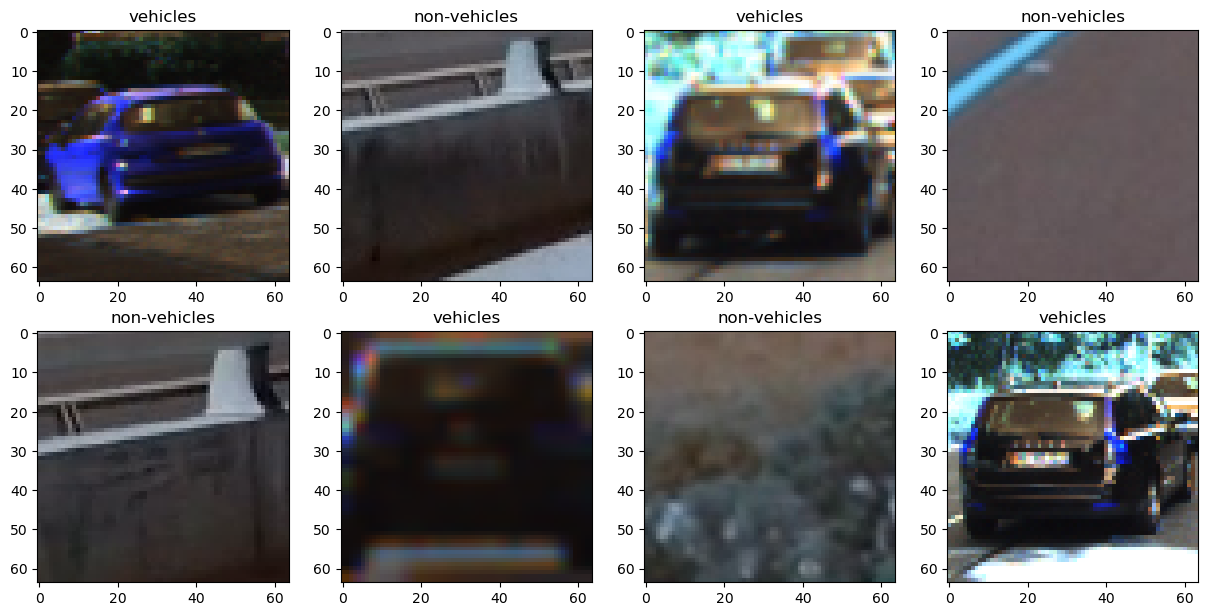

In [6]:
fig = plt.figure(figsize=(15,15))
for i in range(8):
    fig.add_subplot(4,4,i+1).set_title(data['label'][i])
    img = cv2.imread(data['image'][i])
    plt.imshow(img)
    
plt.show()

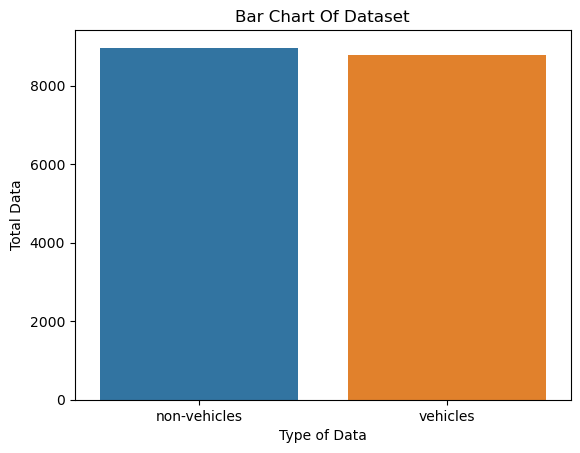

Total Images class [0]:8968
Total Images class [1]:8792


In [7]:
data_label = data['label'].value_counts()
plt.figure()
sns.barplot(x = data_label.index, y = data_label)
plt.xlabel("Type of Data")
plt.ylabel("Total Data")
plt.title("Bar Chart Of Dataset")
plt.show()
print(f"Total Images class [0]:{data_label[0]}")
print(f"Total Images class [1]:{data_label[1]}")

In [8]:
X_train,X_test = train_test_split(data,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(14208, 3)
(3552, 3)


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 25,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

validation_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

test_set = test_datagen.flow_from_dataframe(
    dataframe = X_test,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    shuffle = False,
    batch_size = 32)


Found 11367 validated image filenames belonging to 2 classes.
Found 2841 validated image filenames belonging to 2 classes.
Found 3552 validated image filenames belonging to 2 classes.


In [11]:
print(f" Total training images {X_train.shape[0]}")
print(f" Total test images {X_test.shape[0]}")

print(f" Train Set Size : {(training_set.samples)}")
print(f" Validation Set Size : {(validation_set.samples)}")
print(f" Testing Set Size : {(test_set.samples)}")

 Total training images 14208
 Total test images 3552
 Train Set Size : 11367
 Validation Set Size : 2841
 Testing Set Size : 3552


In [14]:
Vacmodel = Sequential()
Vacmodel.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (64,64,3)))
Vacmodel.add(MaxPool2D(pool_size=(2,2)))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
Vacmodel.add(MaxPool2D(pool_size=(2,2)))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
Vacmodel.add(MaxPool2D(pool_size=(2,2)))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',  activation ='relu'))
Vacmodel.add(MaxPool2D(pool_size=(2,2)))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',  activation ='relu'))
Vacmodel.add(MaxPool2D(pool_size=(2,2)))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Flatten())
Vacmodel.add(BatchNormalization())
Vacmodel.add(Dense(512, activation = "relu"))
Vacmodel.add(Dropout(0.2))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Dense(256, activation = "relu"))
Vacmodel.add(Dropout(0.2))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Dense(64, activation = "relu"))
Vacmodel.add(BatchNormalization())
Vacmodel.add(Dense(2, activation = "softmax"))

In [15]:
Vacmodel.compile(optimizer = 'adam', loss= "categorical_crossentropy", metrics=["acc"])

In [16]:
Vacmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [17]:
history = Vacmodel.fit(training_set, epochs=10,validation_data = validation_set,batch_size=32)

Epoch 1/10
356/356 [==============================] - 165s 432ms/step - loss: 0.1788 - acc: 0.9302 - val_loss: 4.3261 - val_acc: 0.5086
Epoch 2/10
356/356 [==============================] - 122s 342ms/step - loss: 0.0848 - acc: 0.9694 - val_loss: 0.0688 - val_acc: 0.9754
Epoch 3/10
356/356 [==============================] - 121s 339ms/step - loss: 0.0668 - acc: 0.9776 - val_loss: 0.0728 - val_acc: 0.9722
Epoch 4/10
356/356 [==============================] - 129s 361ms/step - loss: 0.0675 - acc: 0.9773 - val_loss: 0.0713 - val_acc: 0.9754
Epoch 5/10
356/356 [==============================] - 128s 360ms/step - loss: 0.0546 - acc: 0.9805 - val_loss: 0.0370 - val_acc: 0.9863
Epoch 6/10
356/356 [==============================] - 126s 355ms/step - loss: 0.0533 - acc: 0.9828 - val_loss: 0.1004 - val_acc: 0.9641
Epoch 7/10
356/356 [==============================] - 123s 345ms/step - loss: 0.0480 - acc: 0.9853 - val_loss: 0.0349 - val_acc: 0.9908
Epoch 8/10
356/356 [============================

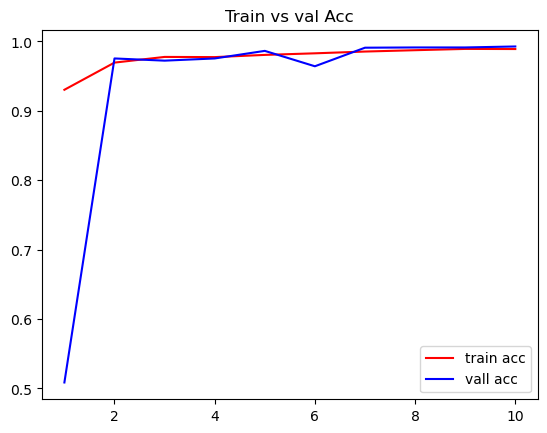

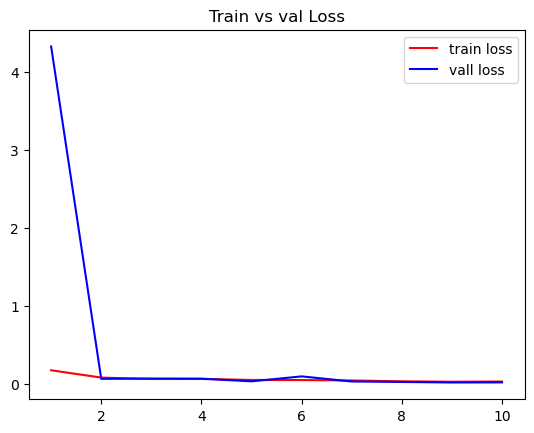

In [18]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)
plt.figure()
plt.title("Train vs val Acc")
plt.plot(epochs,train_acc,'red',label="train acc")
plt.plot(epochs,val_acc,'blue',label="vall acc")
plt.legend()
plt.show()

plt.figure()
plt.title("Train vs val Loss")
plt.plot(epochs,train_loss,'red',label="train loss")
plt.plot(epochs,val_loss,'blue',label="vall loss")
plt.legend()

plt.show()



In [19]:
test_score = Vacmodel.evaluate(test_set)

111/111 [==============================] - 13s 115ms/step - loss: 0.0195 - acc: 0.9921


In [20]:
print(f'Test Score:{test_score[1]}')
print(f'Test Loss:{test_score[0]}')

Test Score:0.9921171069145203
Test Loss:0.019515449181199074


In [21]:

predicted_label = Vacmodel.predict(test_set)
predicted_label = np.argmax(predicted_label,axis=1)
predicted_label

111/111 [==============================] - 7s 59ms/step


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
test_class =test_set.labels
test_class = np.array(test_class)
test_class2 = test_class.flatten()
test_class2

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
class_ind = test_set.class_indices
labels_id = list(class_ind.keys())
labels_id

['non-vehicles', 'vehicles']

              precision    recall  f1-score   support

non-vehicles       1.00      0.99      0.99      1799
    vehicles       0.99      1.00      0.99      1753

    accuracy                           0.99      3552
   macro avg       0.99      0.99      0.99      3552
weighted avg       0.99      0.99      0.99      3552



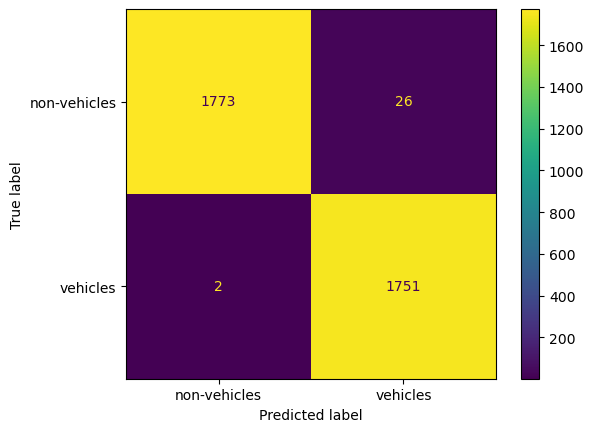

In [24]:

confusion_data = confusion_matrix(test_class2,predicted_label)

# Classification report
print(classification_report(test_class2, predicted_label, target_names= labels_id))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_data, display_labels = labels_id)

cm_display.plot()
plt.show()



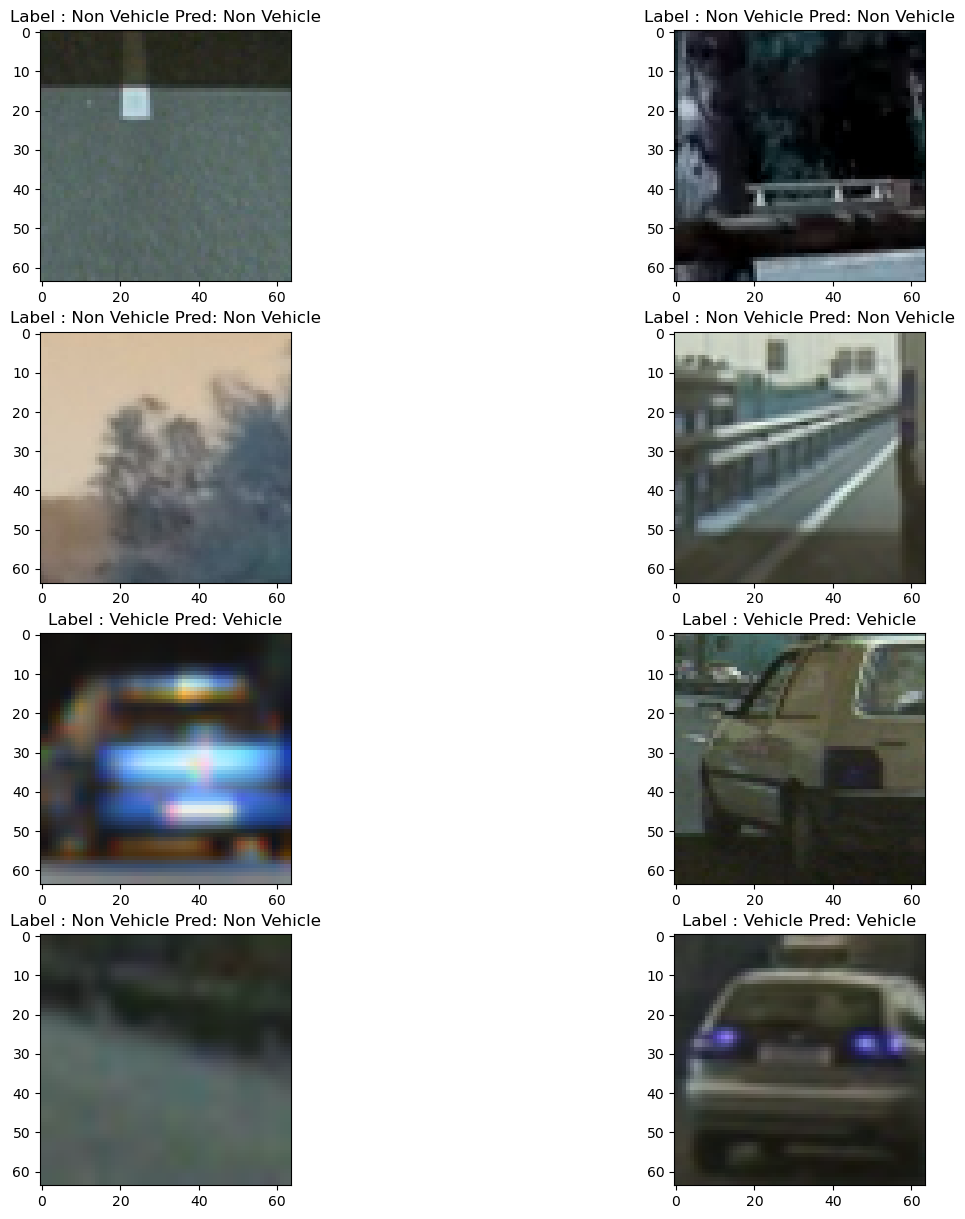

In [25]:
test_datas = test_set.filenames
labels_data = test_set.labels

fig = plt.figure(figsize=(15,15))

for i in range(8):
    if labels_data[i] == 0:
        test_label = "Non Vehicle"
    else:
        test_label = "Vehicle"
    if predicted_label[i] == 0:
        predict_lab = "Non Vehicle"
    else :
        predict_lab = "Vehicle"
    label = "Label : "+ test_label +" Pred: "+predict_lab
    
    fig.add_subplot(4,2,i+1).set_title(label)
    img = cv2.imread(test_datas[i])
    plt.imshow(img)
    
plt.show()


In [26]:
Vacmodel.save('my_model2.h5')

C:\Users\yashp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
